In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff  

In [3]:
data = pd.read_csv("FAANG_clean.csv")

In [7]:
data

,Open,High,Low,Close,Adj Close,Volume,Market Cap,PE Ratio,Beta,EPS,...,month_8,month_9,month_10,month_11,month_12,day_of_week_Friday,day_of_week_Monday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,1.156786,1.162679,1.117857,1.130179,0.954409,293751500,3.580000e+12,35.789955,1.239,6.57,...,False,False,False,False,False,False,True,False,False,False
1,1.139107,1.169107,1.124464,1.141786,0.964210,293751500,3.580000e+12,35.789955,1.239,6.57,...,False,False,False,False,False,False,False,False,True,False
2,1.151071,1.165179,1.143750,1.151786,0.972655,293751500,3.580000e+12,35.789955,1.239,6.57,...,False,False,False,False,False,False,False,False,False,True
3,1.154821,1.159107,1.130893,1.152679,0.973409,293751500,3.580000e+12,35.789955,1.239,6.57,...,False,False,False,False,False,False,False,True,False,False
4,1.160714,1.243393,1.156250,1.236607,1.044284,293751500,3.580000e+12,35.789955,1.239,6.57,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23050,319.531527,323.578279,316.243249,319.843610,318.384955,2299500,3.250000e+11,42.824500,1.147,17.67,...,False,False,True,False,False,True,False,False,False,False
23051,319.531527,323.578279,316.243249,319.843610,318.384955,2797100,3.250000e+11,42.824500,1.147,17.67,...,False,False,True,False,False,False,True,False,False,False
23052,319.531527,323.578279,316.243249,319.843610,318.384955,2932800,3.250000e+11,42.824500,1.147,17.67,...,False,False,True,False,False,False,False,False,True,False
23053,319.531527,323.578279,316.243249,319.843610,318.384955,2494300,3.250000e+11,42.824500,1.147,17.67,...,False,False,True,False,False,False,False,False,False,True


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23055 entries, 0 to 23054
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Open                      23055 non-null  float64
 1   High                      23055 non-null  float64
 2   Low                       23055 non-null  float64
 3   Close                     23055 non-null  float64
 4   Adj Close                 23055 non-null  float64
 5   Volume                    23055 non-null  int64  
 6   Market Cap                23055 non-null  float64
 7   PE Ratio                  23055 non-null  float64
 8   Beta                      23055 non-null  float64
 9   EPS                       23055 non-null  float64
 10  Forward PE                23055 non-null  float64
 11  Net Income                23055 non-null  float64
 12  Debt to Equity            23055 non-null  float64
 13  Return on Equity (ROE)    23055 non-null  float64
 14  Curren

In [9]:
#compute descriptive statistics
descriptive_stats = data.describe(include = [float, int]).T
descriptive_stats['Median'] = data.median(numeric_only = True)
descriptive_stats['Mode'] = data.mode().iloc[0]
print(descriptive_stats)

                            count          mean           std           min  \
Open                      23055.0  8.377687e+01  9.574533e+01  1.139107e+00   
High                      23055.0  8.484244e+01  9.702575e+01  1.159107e+00   
Low                       23055.0  8.276773e+01  9.461387e+01  1.117857e+00   
Close                     23055.0  8.382347e+01  9.582393e+01  1.130179e+00   
Adj Close                 23055.0  8.326627e+01  9.563482e+01  9.544085e-01   
Volume                    23055.0  9.345434e+07  9.471904e+07  1.144000e+06   
Market Cap                23055.0  1.912023e+12  1.084576e+12  3.250000e+11   
PE Ratio                  23055.0  3.591245e+01  8.300362e+00  2.349283e+01   
Beta                      23055.0  1.152678e+00  7.078544e-02  1.038000e+00   
EPS                       23055.0  1.029935e+01  6.071170e+00  4.180000e+00   
Forward PE                23055.0  2.823359e+01  5.725820e+00  1.884292e+01   
Net Income                23055.0  5.924319e+10  3.4

*DATA VISUALIZATION*


C:\Users\ddeva\AppData\Local\Temp\ipykernel_10508\1142048894.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Company_counts.index, y=Company_counts.values, palette=colors)


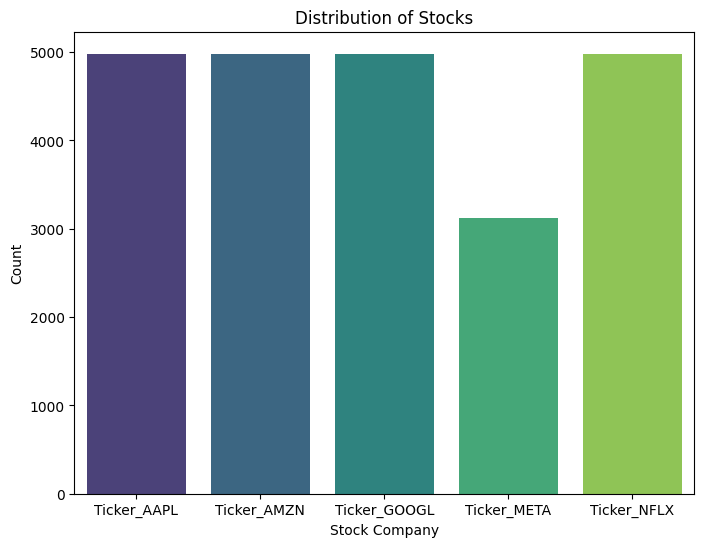

In [10]:
# Distribution of different tickers
Companies = ['Ticker_AAPL', 'Ticker_AMZN', 'Ticker_GOOGL', 'Ticker_META', 'Ticker_NFLX']
Company_counts = data[Companies].sum()

# Define a color palette
colors = sns.color_palette("viridis", len(Companies))

plt.figure(figsize=(8, 6))
sns.barplot(x=Company_counts.index, y=Company_counts.values, palette=colors)
plt.title('Distribution of Stocks')
plt.xlabel('Stock Company')
plt.ylabel('Count')
plt.show()

In [11]:
data[['Ticker_AAPL', 'Ticker_AMZN', 'Ticker_GOOGL', 'Ticker_META', 'Ticker_NFLX']].value_counts()

Ticker_AAPL  Ticker_AMZN  Ticker_GOOGL  Ticker_META  Ticker_NFLX
False        False        True          False        False          4983
True         False        False         False        False          4983
False        False        False         False        True           4982
             True         False         False        False          4982
             False        False         True         False          3125
Name: count, dtype: int64

In [12]:
amz = data[data['Ticker_AMZN'] ]
gle = data[data['Ticker_GOOGL'] ]
ntf = data[data['Ticker_NFLX']]
apl = data[data['Ticker_AAPL'] ]
fac = data[data['Ticker_META']]

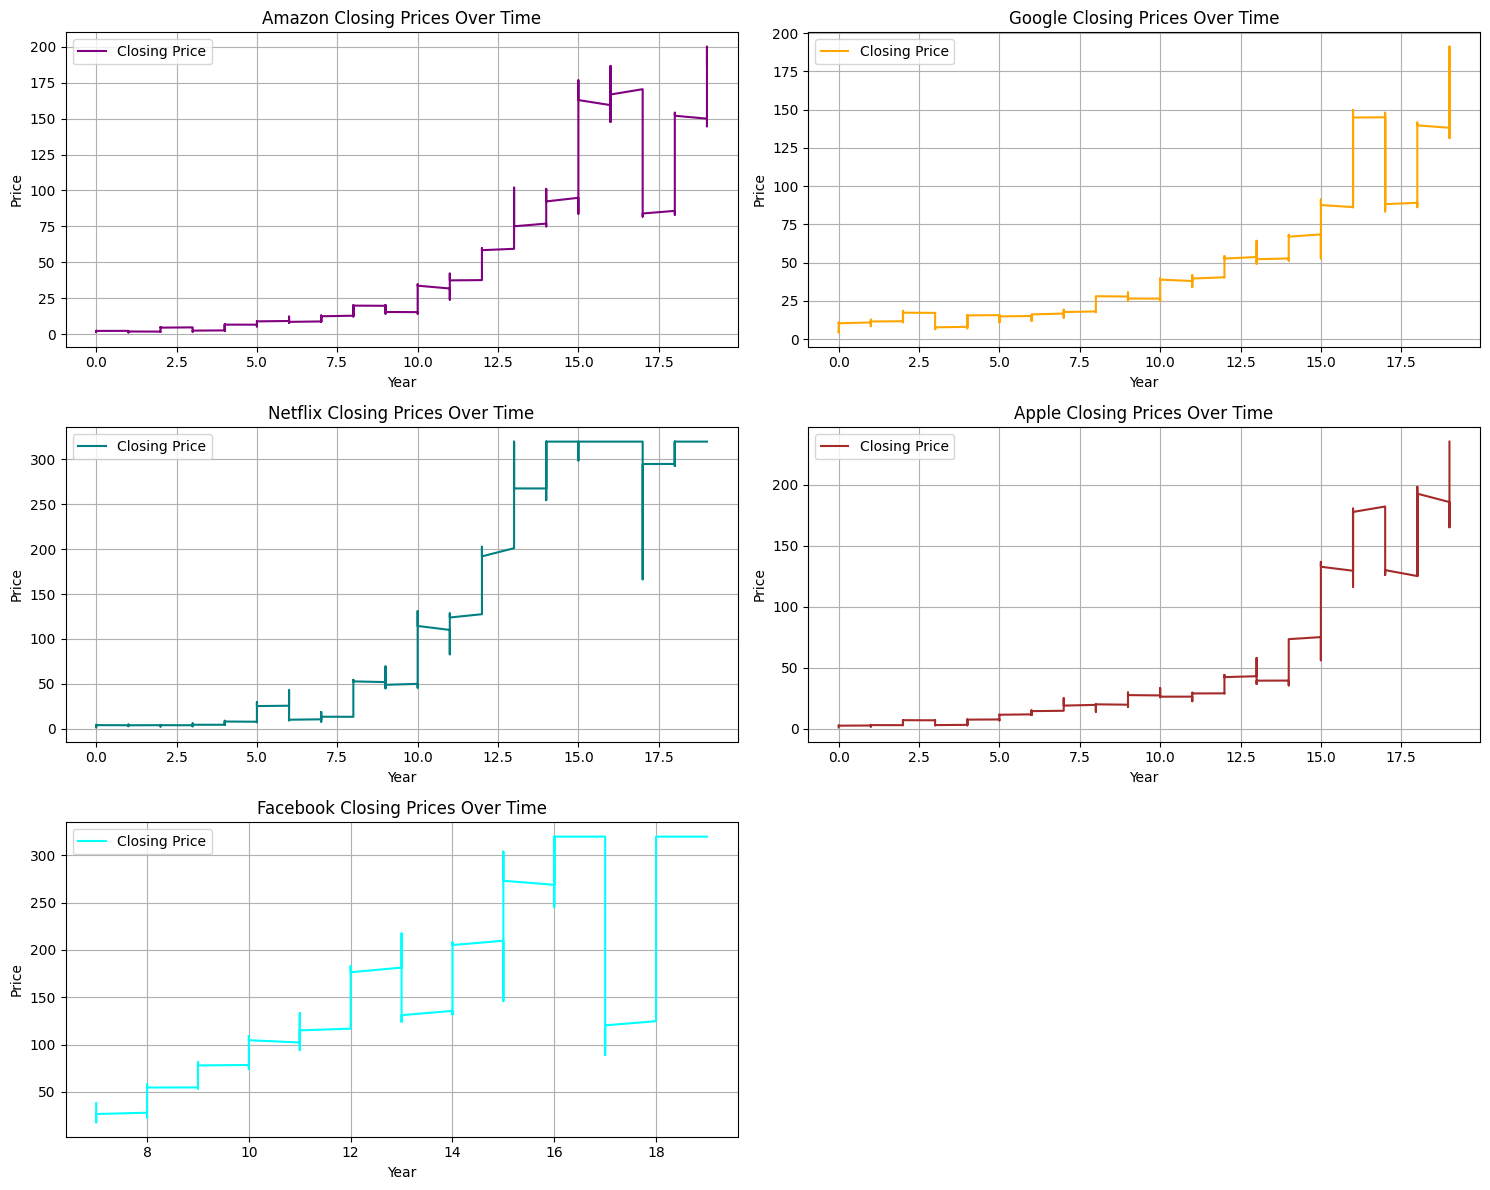

In [13]:
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

axs = axs.flat

# Amazon
axs[0].plot(amz['year_encoded'], amz['Close'], label='Closing Price', color='purple')
axs[0].set_title('Amazon Closing Prices Over Time')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Price')
axs[0].legend()
axs[0].grid()

# Google
axs[1].plot(gle['year_encoded'], gle['Close'], label='Closing Price', color='orange')
axs[1].set_title('Google Closing Prices Over Time')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Price')
axs[1].legend()
axs[1].grid()

# Netflix
axs[2].plot(ntf['year_encoded'], ntf['Close'], label='Closing Price', color='teal')
axs[2].set_title('Netflix Closing Prices Over Time')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Price')
axs[2].legend()
axs[2].grid()

# Apple
axs[3].plot(apl['year_encoded'], apl['Close'], label='Closing Price', color='brown')
axs[3].set_title('Apple Closing Prices Over Time')
axs[3].set_xlabel('Year')
axs[3].set_ylabel('Price')
axs[3].legend()
axs[3].grid()

# Facebook
axs[4].plot(fac['year_encoded'], fac['Close'], label='Closing Price', color='cyan')
axs[4].set_title('Facebook Closing Prices Over Time')
axs[4].set_xlabel('Year')
axs[4].set_ylabel('Price')
axs[4].legend()
axs[4].grid()

# Remove the empty subplot
fig.delaxes(axs[5])

fig.tight_layout()
plt.show()


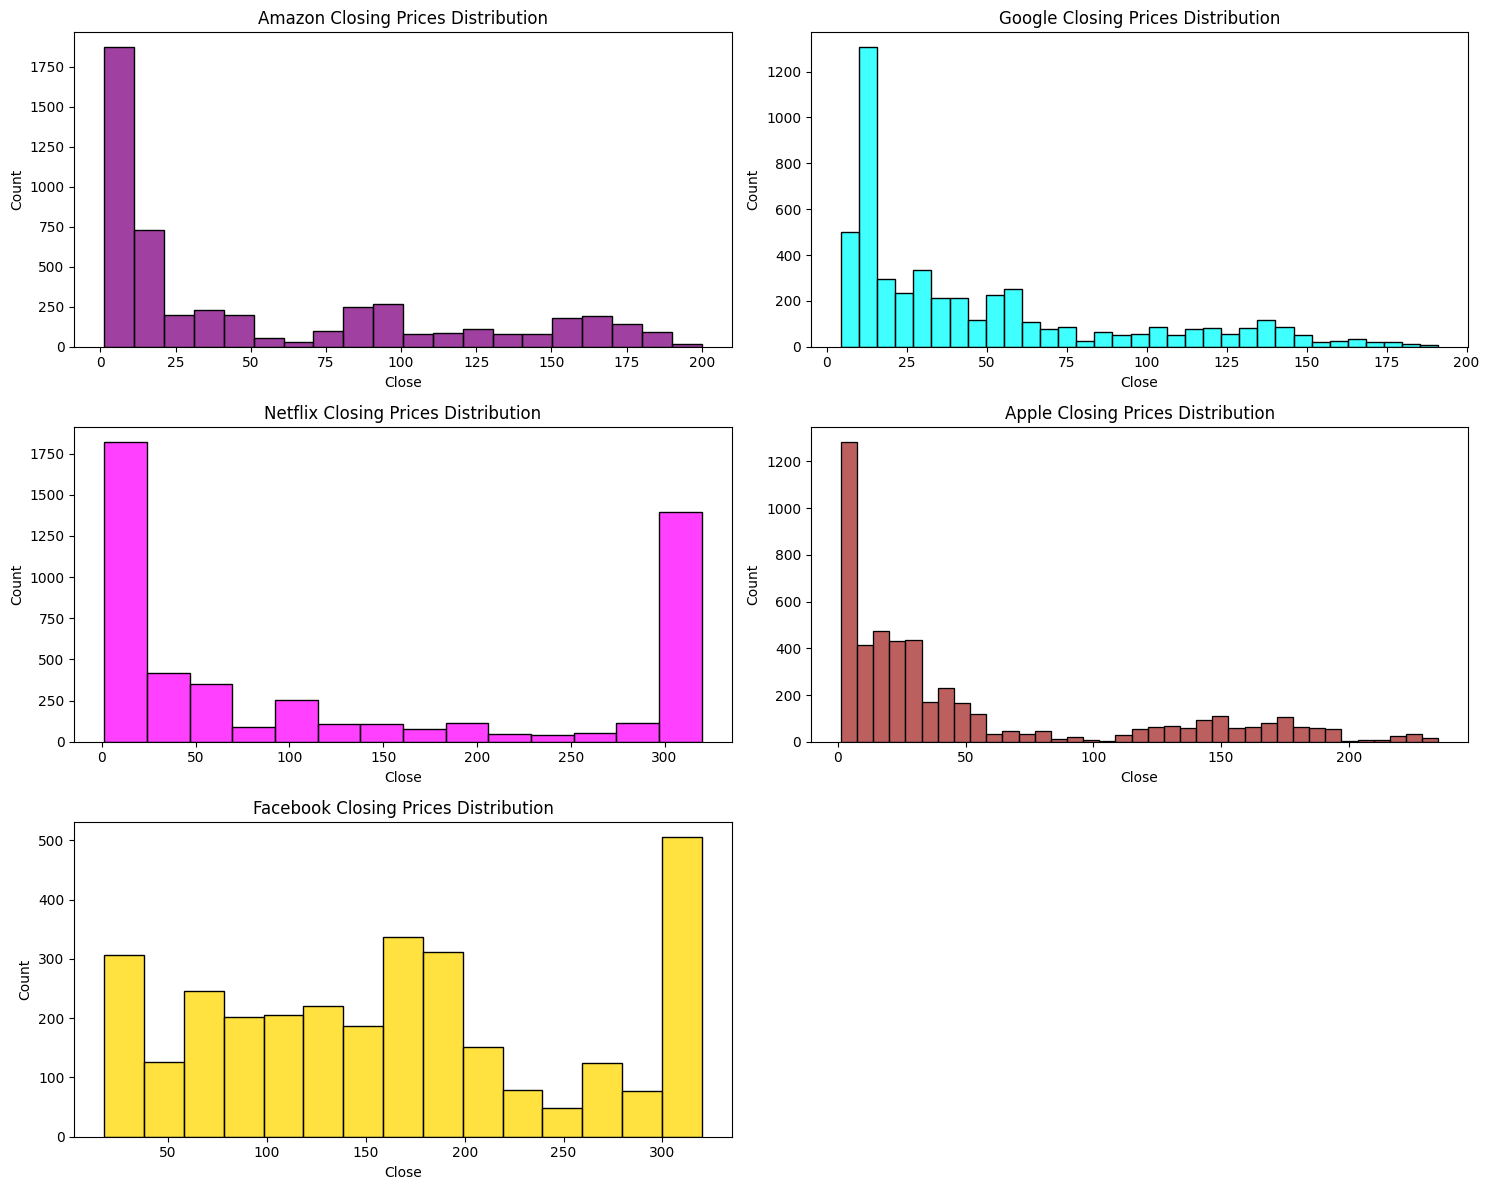

In [14]:
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

axs = axs.flat

# Amazon
sns.histplot(amz['Close'], ax=axs[0], color='purple')
axs[0].set_title('Amazon Closing Prices Distribution')

# Google
sns.histplot(gle['Close'], ax=axs[1], color='cyan')
axs[1].set_title('Google Closing Prices Distribution')

# Netflix
sns.histplot(ntf['Close'], ax=axs[2], color='magenta')
axs[2].set_title('Netflix Closing Prices Distribution')

# Apple
sns.histplot(apl['Close'], ax=axs[3], color='brown')
axs[3].set_title('Apple Closing Prices Distribution')

# Facebook
sns.histplot(fac['Close'], ax=axs[4], color='gold')
axs[4].set_title('Facebook Closing Prices Distribution')

# Remove the empty subplot
fig.delaxes(axs[5])

fig.tight_layout()
plt.show()


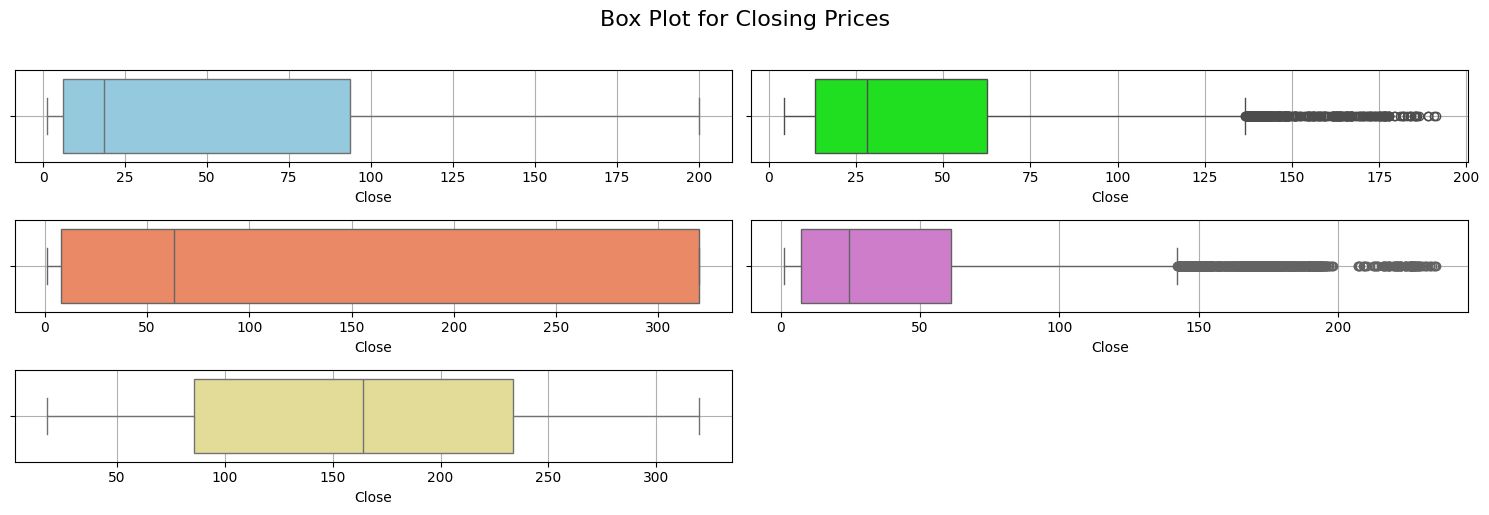

In [15]:
fig, axs = plt.subplots(3, 2, figsize=(15, 5))

axs = axs.flat

plt.suptitle('Box Plot for Closing Prices', fontsize=16, y=1.02)

# Amazon
sns.boxplot(amz['Close'], ax=axs[0], color='skyblue', orient='h')
axs[0].grid()

# Google
sns.boxplot(gle['Close'], ax=axs[1], color='lime', orient='h')
axs[1].grid()

# Netflix
sns.boxplot(ntf['Close'], ax=axs[2], color='coral', orient='h')
axs[2].grid()

# Apple
sns.boxplot(apl['Close'], ax=axs[3], color='orchid', orient='h')
axs[3].grid()

# Facebook
sns.boxplot(fac['Close'], ax=axs[4], color='khaki', orient='h')
axs[4].grid()

# Remove the empty subplot
fig.delaxes(axs[5])

fig.tight_layout()
plt.show()


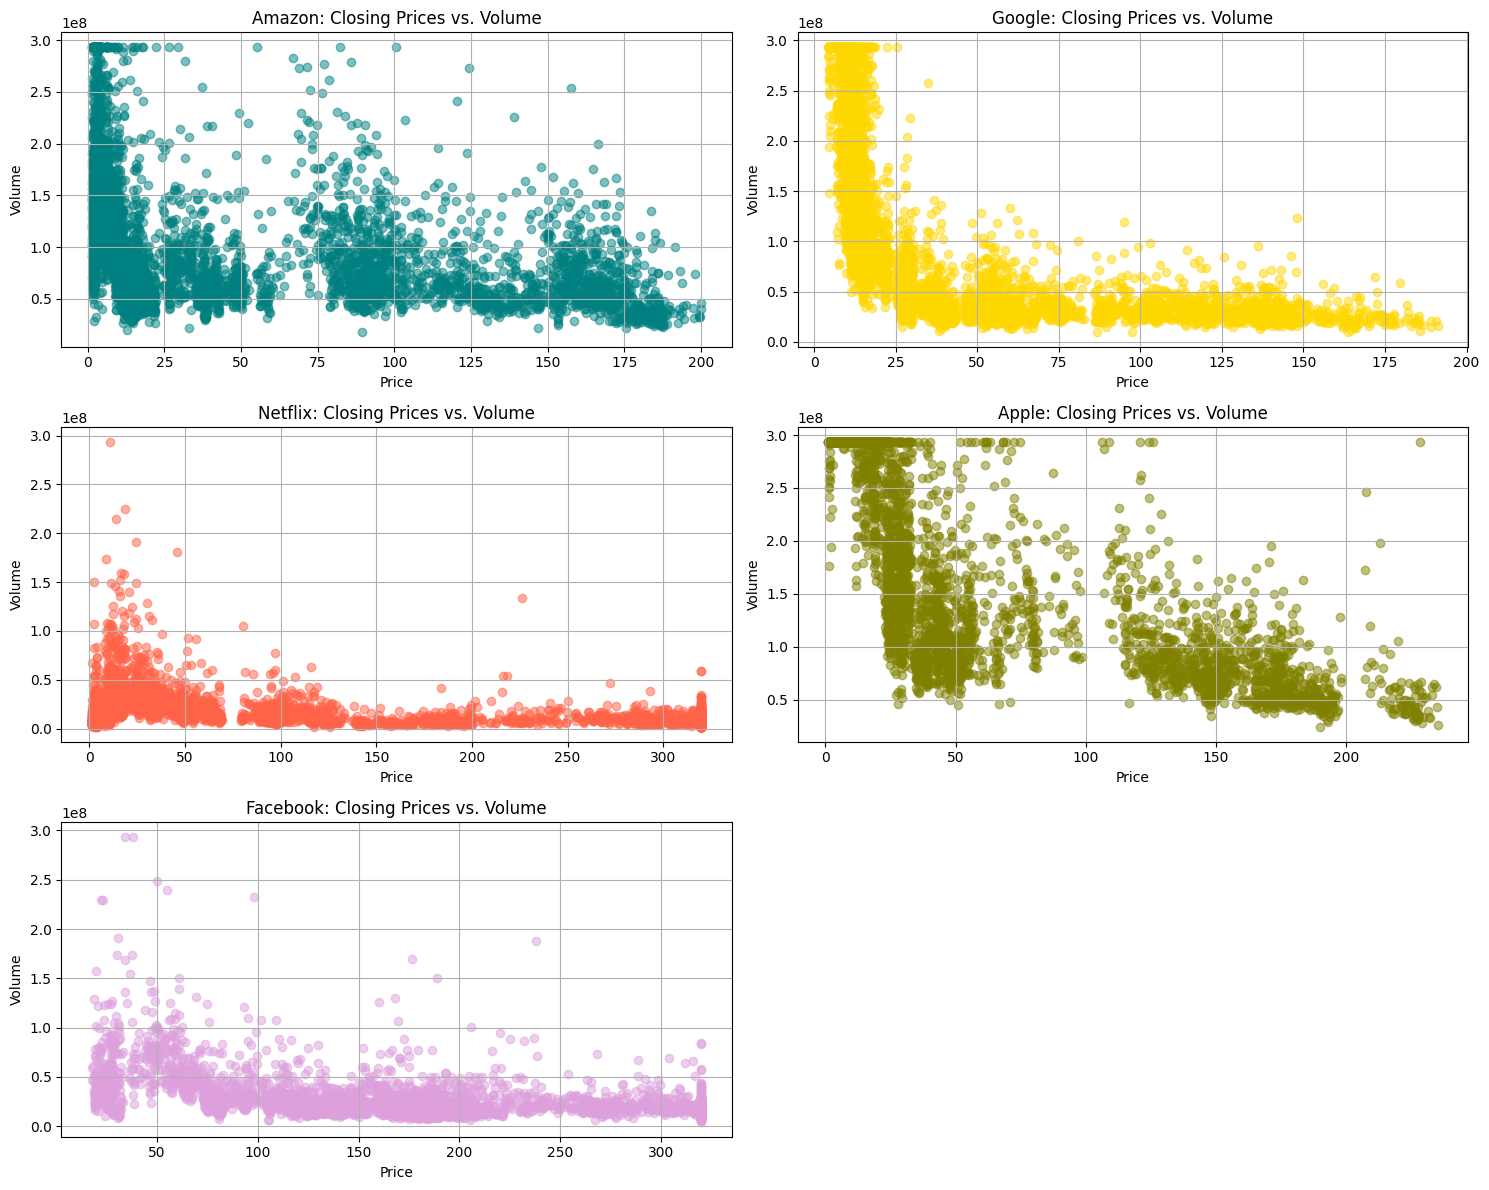

In [16]:
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

axs = axs.flat

# Amazon
axs[0].scatter(amz['Close'], amz['Volume'], alpha=0.5, color='teal')
axs[0].set_title('Amazon: Closing Prices vs. Volume')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Volume')
axs[0].grid()

# Google
axs[1].scatter(gle['Close'], gle['Volume'], alpha=0.5, color='gold')
axs[1].set_title('Google: Closing Prices vs. Volume')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Volume')
axs[1].grid()

# Netflix
axs[2].scatter(ntf['Close'], ntf['Volume'], alpha=0.5, color='tomato')
axs[2].set_title('Netflix: Closing Prices vs. Volume')
axs[2].set_xlabel('Price')
axs[2].set_ylabel('Volume')
axs[2].grid()

# Apple
axs[3].scatter(apl['Close'], apl['Volume'], alpha=0.5, color='olive')
axs[3].set_title('Apple: Closing Prices vs. Volume')
axs[3].set_xlabel('Price')
axs[3].set_ylabel('Volume')
axs[3].grid()

# Facebook
axs[4].scatter(fac['Close'], fac['Volume'], alpha=0.5, color='plum')
axs[4].set_title('Facebook: Closing Prices vs. Volume')
axs[4].set_xlabel('Price')
axs[4].set_ylabel('Volume')
axs[4].grid()

# Remove the empty subplot
fig.delaxes(axs[5])

fig.tight_layout()
plt.show()


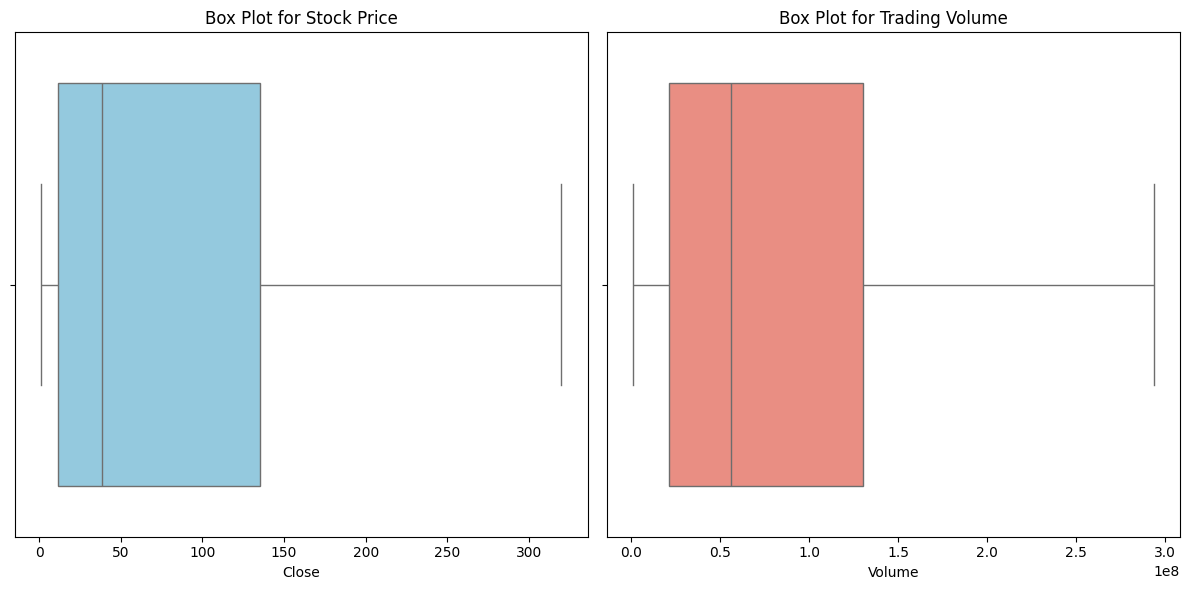

In [17]:
plt.figure(figsize=(12, 6))

# Box plot for 'Close' price
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Close'], color='skyblue')
plt.title('Box Plot for Stock Price')

# Box plot for 'Volume'
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Volume'], color='salmon')
plt.title('Box Plot for Trading Volume')

plt.tight_layout()
plt.show()


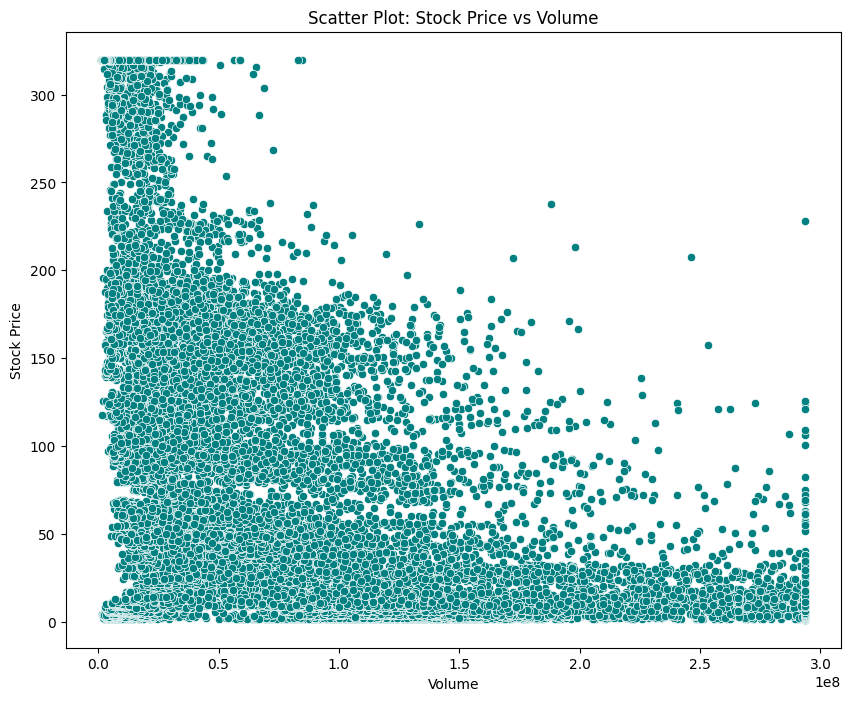

In [18]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Volume'], y=data['Close'], color='teal')
plt.title('Scatter Plot: Stock Price vs Volume')
plt.xlabel('Volume')
plt.ylabel('Stock Price')
plt.show()

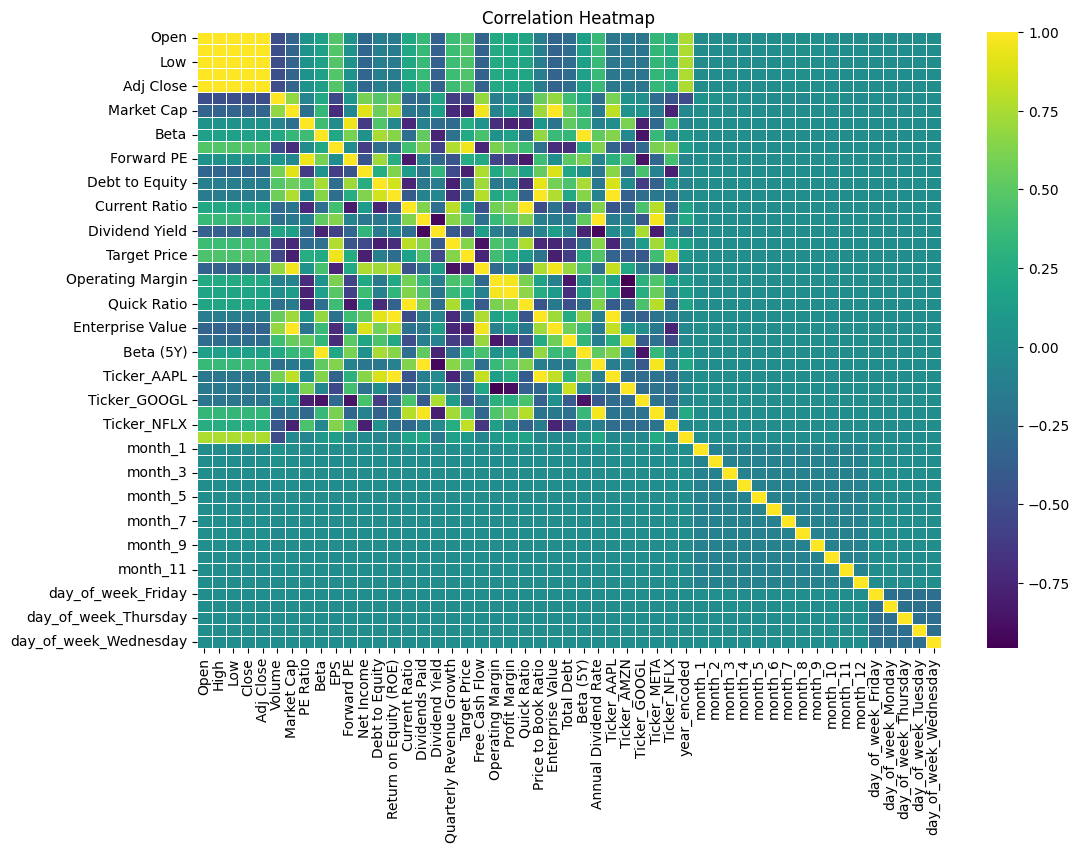

In [19]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plotting the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,  cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Open                        0.999845
High                        0.999924
Low                         0.999921
Close                       1.000000
Adj Close                   0.999963
Volume                     -0.489813
Market Cap                 -0.332149
PE Ratio                    0.043920
Beta                        0.145674
EPS                         0.470585
Forward PE                  0.031706
Net Income                 -0.314775
Debt to Equity             -0.122010
Return on Equity (ROE)     -0.146895
Current Ratio               0.206454
Dividends Paid              0.362889
Dividend Yield             -0.353108
Quarterly Revenue Growth    0.384677
Target Price                0.449846
Free Cash Flow             -0.346899
Operating Margin            0.228591
Profit Margin               0.185695
Quick Ratio                 0.195271
Price to Book Ratio        -0.132806
Enterprise Value           -0.331193
Total Debt                 -0.266405
Beta (5Y)                   0.145674
A

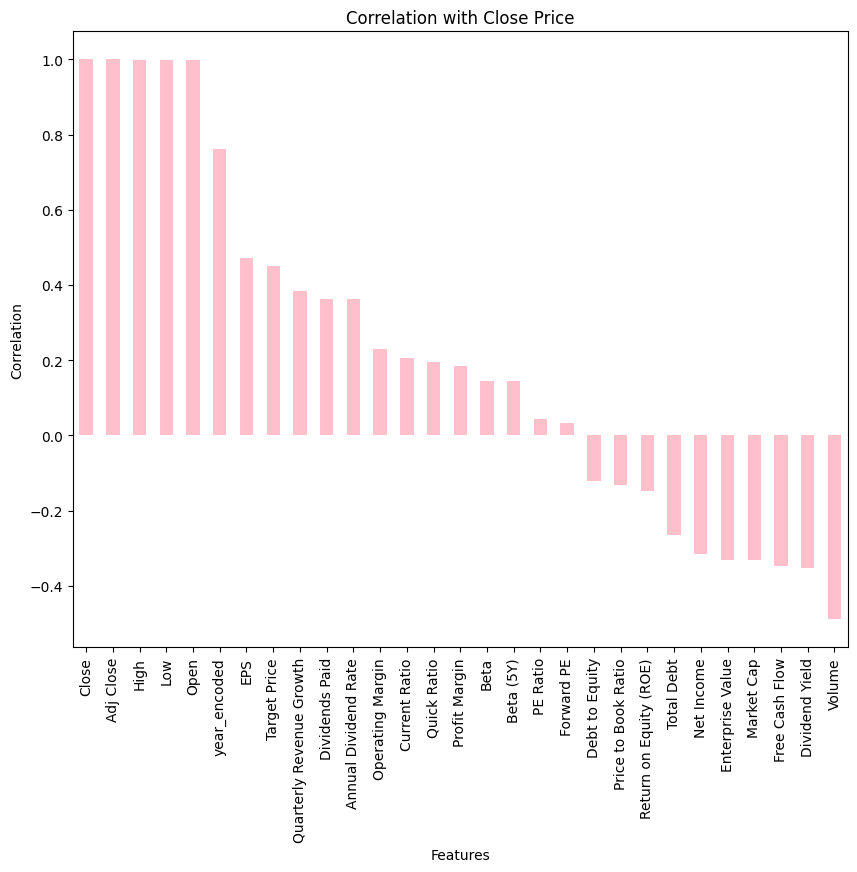

In [20]:
# Calculate the correlation between continuous features and 'Close'
continuous_features = data.select_dtypes(include=['float64', 'int64']).columns
correlations = data[continuous_features].corrwith(data['Close'])

# Display the correlations with 'Close'
print(correlations)

# Plotting the correlation with 'Close'
plt.figure(figsize=(10, 8))
correlations.sort_values(ascending=False).plot(kind='bar', color='pink')
plt.title('Correlation with Close Price')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()

In [21]:
data['Market Cap'] = data['Market Cap'].astype(str)
print(data['Market Cap'].dtype)
data['Market Cap'].value_counts()

object


Market Cap
3580000000000.0    4983
2020000000000.0    4983
2000000000000.0    4982
325000000000.0     4982
1470000000000.0    3125
Name: count, dtype: int64

In [23]:
data['PE Ratio'] = data['PE Ratio'].astype(str)
print(data['PE Ratio'].dtype)
data['PE Ratio'].value_counts()


object


PE Ratio
35.789955    4983
23.492826    4983
45.496414    4982
42.8245      4982
29.612986    3125
Name: count, dtype: int64

In [24]:
data['EPS'] = data['EPS'].astype(str)
print(data['EPS'].dtype)
data['EPS'].value_counts()

object


EPS
6.57     4983
6.97     4983
4.18     4982
17.67    4982
19.56    3125
Name: count, dtype: int64

In [25]:
data['Forward PE'] = data['Forward PE'].astype(str)
print(data['Forward PE'].dtype)
data['Forward PE'].value_counts()

object


Forward PE
31.43583     4983
18.842924    4983
32.732357    4982
32.743786    4982
23.738934    3125
Name: count, dtype: int64

In [26]:
data['Net Income'] = data['Net Income'].astype(str)
print(data['Net Income'].dtype)
data['Net Income'].value_counts()

object


Net Income
102000000000.0    4983
87656996864.0     4983
44418998272.0     4982
7780861952.0      4982
51434000384.0     3125
Name: count, dtype: int64

In [27]:
# Check the data types of each column
categorical_columns = data.select_dtypes(include=['object', 'bool']).columns

# Display the categorical columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Market Cap', 'PE Ratio', 'EPS', 'Forward PE', 'Net Income',
       'Ticker_AAPL', 'Ticker_AMZN', 'Ticker_GOOGL', 'Ticker_META',
       'Ticker_NFLX', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'day_of_week_Friday', 'day_of_week_Monday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday'],
      dtype='object')


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()
data['Market Cap'] = le1.fit_transform(data['Market Cap'])
data['PE Ratio'] = le2.fit_transform(data['PE Ratio'])
data['EPS'] = le3.fit_transform(data['EPS'])
data['Debt to Equity'] = le4.fit_transform(data['Debt to Equity'])
data['Price to Book Ratio'] = le5.fit_transform(data['Price to Book Ratio'])

In [30]:
from scipy import stats

# List of categorical columns to perform ANOVA
categorical_columns = ['Market Cap', 'PE Ratio', 'EPS', 'Debt to Equity', 'Price to Book Ratio',
                       'Ticker_AAPL','Ticker_AMZN', 'Ticker_GOOGL', 'Ticker_META', 'Ticker_NFLX']

# Perform ANOVA for each categorical column
for col in categorical_columns:
    # Check if the column contains only boolean values (True/False) 
    if data[col].dtype == 'bool' or 'object':
        # Drop rows where 'Close' or the categorical column has missing values
        df_clean = data.dropna(subset=['Close', col])
        
        # Group data based on whether the column is True or False
        groups = [df_clean[df_clean[col] == True]['Close'], df_clean[df_clean[col] == False]['Close']]
        
        # Perform ANOVA test
        f_statistic, p_value = stats.f_oneway(*groups)
        
        # Print the result for each column
        print(f'ANOVA Test for {col}: F-statistic = {f_statistic}, p-value = {p_value}')
        
        # If p-value < 0.05, it suggests the feature is significantly related to 'Close'
        if p_value < 0.05:
            print(f"The feature {col} is significantly related to 'Close'.\n")
        else:
            print(f"The feature {col} is NOT significantly related to 'Close'.\n")

ANOVA Test for Market Cap: F-statistic = 4508.263319001887, p-value = 0.0
The feature Market Cap is significantly related to 'Close'.

ANOVA Test for PE Ratio: F-statistic = 5914.3955300995995, p-value = 0.0
The feature PE Ratio is significantly related to 'Close'.

ANOVA Test for EPS: F-statistic = 163.4635968377477, p-value = 4.5130254836493085e-37
The feature EPS is significantly related to 'Close'.

ANOVA Test for Debt to Equity: F-statistic = 5914.3955300995995, p-value = 0.0
The feature Debt to Equity is significantly related to 'Close'.

ANOVA Test for Price to Book Ratio: F-statistic = 25.696269902512135, p-value = 4.067789459372173e-07
The feature Price to Book Ratio is significantly related to 'Close'.

ANOVA Test for Ticker_AAPL: F-statistic = 750.751345065806, p-value = 1.1098520546637887e-162
The feature Ticker_AAPL is significantly related to 'Close'.

ANOVA Test for Ticker_AMZN: F-statistic = 688.8428244871384, p-value = 1.2576799982833683e-149
The feature Ticker_AMZN is

In [31]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Market Cap',
       'PE Ratio', 'Beta', 'EPS', 'Forward PE', 'Net Income', 'Debt to Equity',
       'Return on Equity (ROE)', 'Current Ratio', 'Dividends Paid',
       'Dividend Yield', 'Quarterly Revenue Growth', 'Target Price',
       'Free Cash Flow', 'Operating Margin', 'Profit Margin', 'Quick Ratio',
       'Price to Book Ratio', 'Enterprise Value', 'Total Debt', 'Beta (5Y)',
       'Annual Dividend Rate', 'Ticker_AAPL', 'Ticker_AMZN', 'Ticker_GOOGL',
       'Ticker_META', 'Ticker_NFLX', 'year_encoded', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday'],
      dtype='object')

In [32]:
# Drop the specified columns
df_data = data.drop(['Forward PE', 'Net Income', 'Return on Equity (ROE)','Beta', 'Adj Close',
                  'Current Ratio', 'Dividends Paid', 'Dividend Yield',
                  'Quarterly Revenue Growth', 'Target Price', 'Free Cash Flow',
                  'Operating Margin', 'Profit Margin', 'Quick Ratio',
                  'Enterprise Value', 'Total Debt', 'Beta (5Y)', 'Annual Dividend Rate'], axis=1)

In [33]:
# Define the columns for outlier clipping
price_columns = ['Open', 'High', 'Low', 'Close', 'Market Cap', 'PE Ratio', 'Price to Book Ratio', 'Debt to Equity', 'EPS']
volume_column = 'Volume'

# Function to clip outliers using IQR
def clip_outliers_iqr(df_data, column):
    if df_data[column].isnull().any():
        print(f"Warning: Column '{column}' contains missing values.")
    Q1 = df_data[column].quantile(0.25)  # First quartile
    Q3 = df_data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Clip the values to the lower and upper bounds
    df_data[column] = df_data[column].clip(lower=lower_bound, upper=upper_bound)

# Apply IQR-based clipping to price and volume columns
for column in price_columns + [volume_column]:
    if column in df_data.columns:
        clip_outliers_iqr(df_data, column)
    else:
        print(f"Warning: Column '{column}' not found in the dataset.")

# Check the shape of the dataset after IQR-based clipping
print(f"Shape of the dataset after clipping: {df_data.shape}")

Shape of the dataset after clipping: (23055, 33)


In [34]:
df_data.to_csv("EDA_processing.csv", index = False)

In [35]:
import pickle

In [36]:
pickle.dump(le1, open('market_cap_label_encoder.pkl', 'wb'))
pickle.dump(le2, open('pe_ratio_label_encoder.pkl', 'wb'))
pickle.dump(le3, open('eps_label_encoder.pkl', 'wb'))
pickle.dump(le4, open('debt_to_equity_label_encoder.pkl', 'wb'))
pickle.dump(le5, open('price_to_book_ratio_label_encoder.pkl', 'wb'))